<a href="https://colab.research.google.com/github/kaluznys/prace-z-analizy-i-wizualizacji-danych/blob/main/zadania_z_eksploracji_domy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# wczytanie danych z house_data.csv umieszczonego w repozytorium
df = pd.read_csv('https://raw.githubusercontent.com/kaluznys/prace-z-analizy-i-wizualizacji-danych/refs/heads/main/house_data.csv')

In [ ]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
domki = df

Zadanie 1

In [5]:
print(domki.loc[(domki.waterfront==1) & (domki.grade >= domki.grade.median()), 'price'].mean())

1784151.7006802722


Zadanie 2

In [ ]:
a = domki.loc[domki.floors == 2.0, 'bathrooms'].median()
b = domki.loc[domki.floors == 3.0, 'bathrooms'].median()
print(a - b)

0.0


nie, są równe

Zadanie 3

In [ ]:
a = domki.loc[domki.lat > (domki.lat.max() + domki.lat.min())/2].groupby('waterfront').grade.quantile([0.25, 0.75])
a

waterfront      
0           0.25     7.0
            0.75     8.0
1           0.25     8.0
            0.75    10.0
Name: grade, dtype: float64

Dla nieruchomości przy wodzie kwantyle te wynoszą 8 i 10, natomiast dla nieleżących obok wody 7 i 8.

Zadanie 4

In [ ]:
a  = domki.groupby('zipcode').zipcode.agg('count').sort_values(ascending = False)
a
b = domki.loc[domki.zipcode == 98103].price.quantile(0.75)
c = domki.loc[domki.zipcode == 98103].price.quantile(0.25)
print(b-c)

262875.0


Pod kodem pocztowym: 98103
rozstęp międzykwartylowy wynosi: 262875

Zadanie 5

In [ ]:
b = domki.id.count()
a = domki.loc[domki.sqft_lot< domki.sqft_lot15].id.count()
print(a/b*100)

39.513255910794435


39.5132%

Zadanie 6

In [ ]:
a = domki.loc[(domki.long < (domki.long.max()+domki.long.min())/2) & (domki.lat > (domki.lat.max()+domki.lat.min())/2)].id.count()
b = domki.loc[(domki.long > (domki.long.max()+domki.long.min())/2) & (domki.lat < (domki.lat.max()+domki.lat.min())/2)].id.count()
print(a/b*100-100)

18343.529411764706


o 18343.529411764706 % więcej

Wykresy

zad 1

In [ ]:
import matplotlib.pyplot as plt

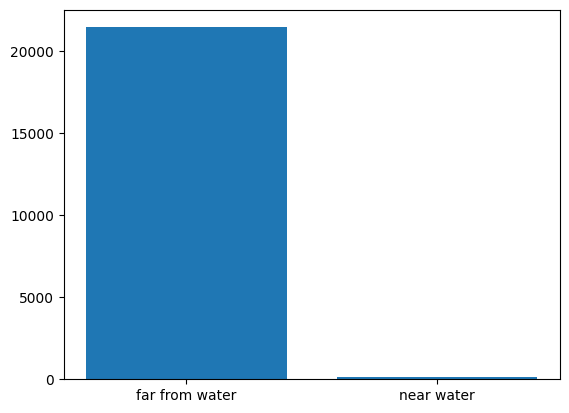

In [ ]:
plt.bar(["far from water", "near water"], list(domki.groupby('waterfront').agg("count").id))
plt.show()

zad.2

In [ ]:
import seaborn as sns

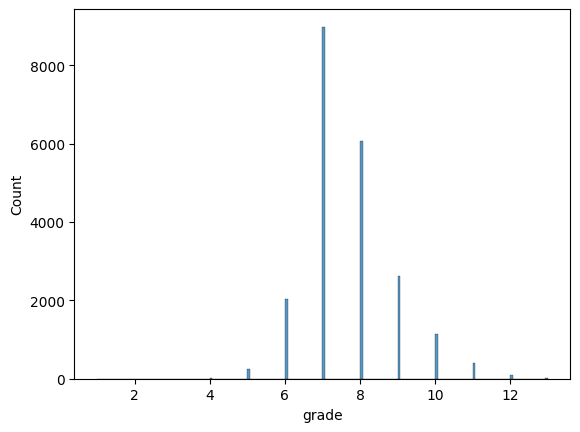

In [ ]:
sns.histplot(domki[['id','grade']], x="grade")
plt.show()

Zad. 3

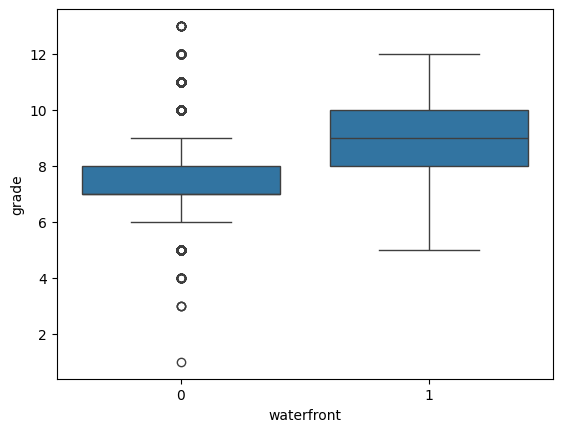

In [ ]:

sns.boxplot(domki, x = "waterfront", y = "grade")
plt.show()